In [42]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

### Punto A: 

#### Para toda la ventana de tiempo, ¿cómo se distribuyen las probabilidades asignadas por el modelo entre los dos grupos? 

In [27]:
paths_bsl = ["a-b_testing/outputs/churn_test_baseline_01.json",
             "a-b_testing/outputs/churn_test_baseline_02.json",
             "a-b_testing/outputs/churn_test_baseline_03.json",
             "a-b_testing/outputs/churn_test_baseline_04.json",
             "a-b_testing/outputs/churn_test_baseline_05.json",
             "a-b_testing/outputs/churn_test_baseline_06.json",
             "a-b_testing/outputs/churn_test_baseline_07.json"]

all_bsl = []
for p in paths_bsl:
    with open(p, 'r') as j:
        s = j.read()[1:-1]
        s = s.replace('\\','')
        content = json.loads(s)
        all_bsl.extend(content)

df_bsl = pd.DataFrame(all_bsl)

In [28]:
paths_opt = ["a-b_testing/outputs/churn_test_optimized_01.json",
             "a-b_testing/outputs/churn_test_optimized_02.json",
             "a-b_testing/outputs/churn_test_optimized_03.json",
             "a-b_testing/outputs/churn_test_optimized_04.json",
             "a-b_testing/outputs/churn_test_optimized_05.json",
             "a-b_testing/outputs/churn_test_optimized_06.json",
             "a-b_testing/outputs/churn_test_optimized_07.json"]

all_opt = []
for p in paths_opt:
    with open(p, 'r') as j:
        s = j.read()[1:-1]
        s = s.replace('\\','')
        content = json.loads(s)
        all_opt.extend(content)

df_opt = pd.DataFrame(all_opt)

(0.0, 180.0)

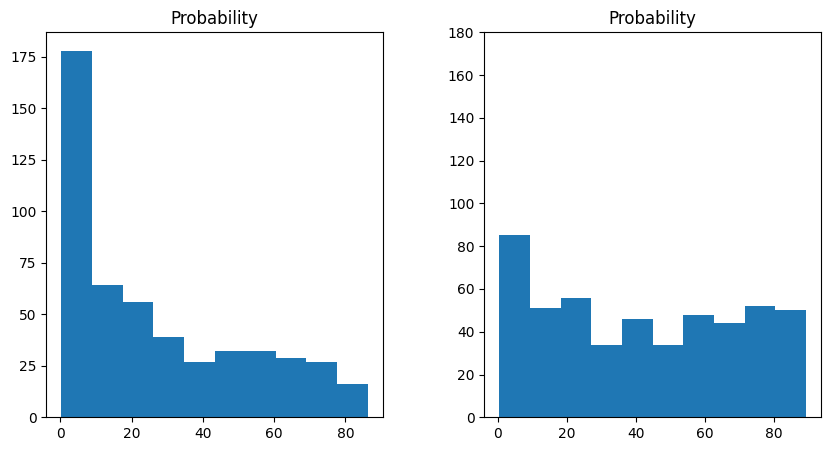

In [40]:
fig, axes = plt.subplots(1,2)

fig.set_figwidth(10)
fig.set_figheight(5)

df_bsl.hist(column="Probability",bins=10,grid=False, ax=axes[0])
df_opt.hist(column="Probability",bins=10,grid=False, ax=axes[1])
plt.ylim(top=180)

#### Asumiendo que las distribuciones tienen un comportamiento normal, ¿dichas diferencias entre las probabilidades de ambas variantes del modelo son significativas?

In [43]:
# T TEST

### Punto B: 

#### ¿Cuál fue el incremento o decremento porcentual diario de predicción de casos de churn que tuvo el mejor modelo (punto 3) respecto al baseline (punto 2)?


In [48]:
paths_01 = ["a-b_testing/outputs/churn_test_baseline_01.json",
            "a-b_testing/outputs/churn_test_optimized_01.json"]

bsl_01 = []
with open(paths_01[0], 'r') as j:
    s = j.read()[1:-1]
    s = s.replace('\\','')
    content = json.loads(s)
    bsl_01.extend(content)

df_bsl_01 = pd.DataFrame(bsl_01)
df_bsl_01['type'] = 'baseline'

opt_01 = []
with open(paths_01[1], 'r') as j:
    s = j.read()[1:-1]
    s = s.replace('\\','')
    content = json.loads(s)
    opt_01.extend(content)

df_opt_01 = pd.DataFrame(opt_01)
df_opt_01['type'] = 'optimized'

,Prediction,Probability,type
0,1,64.403265,baseline
1,0,10.291132,baseline
2,0,7.257089,baseline
3,1,66.340598,baseline
4,0,6.558933,baseline
...,...,...,...
72,0,5.205922,baseline
73,0,29.127427,baseline
74,0,0.855468,baseline
75,0,4.522143,baseline


,Prediction,Probability,type
0,1,52.580819,optimized
1,0,44.688176,optimized
2,0,12.276632,optimized
3,1,84.712960,optimized
4,1,77.517616,optimized
...,...,...,...
70,0,45.251495,optimized
71,0,5.532007,optimized
72,0,22.921631,optimized
73,0,46.301922,optimized


In [50]:
df_01 = pd.concat([df_bsl_01,df_opt_01], axis=0)
df_01

,Prediction,Probability,type
0,1,64.403265,baseline
1,0,10.291132,baseline
2,0,7.257089,baseline
3,1,66.340598,baseline
4,0,6.558933,baseline
...,...,...,...
70,0,45.251495,optimized
71,0,5.532007,optimized
72,0,22.921631,optimized
73,0,46.301922,optimized
